In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

## Gather data

In [119]:
#read file 'fake.csv' :
df_fake=pd.read_csv('fake.csv')
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [120]:
# add column 'target'
df_fake['target']='spam'

In [121]:
#read file 'true.csv' :
df_true=pd.read_csv('true.csv')
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [122]:
# add column 'target'
df_true['target']='ham'

In [123]:
#concate to data frames
df=pd.concat([df_fake,df_true],ignore_index=True,axis=0)
df

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",spam
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",spam
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",spam
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",spam
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",spam
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",ham
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",ham
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",ham
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",ham


### clean data

In [124]:
df.shape

(44898, 5)

In [125]:
# get information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [126]:
# convert date from string type to date time 
df['date']=pd.to_datetime(df['date'], errors='coerce')


In [127]:
#check null values
df.isnull().sum()

title       0
text        0
subject     0
date       10
target      0
dtype: int64

In [128]:
# fill null values by median
df['date'].fillna(df.date.median(),inplace=True)

In [129]:
#check null values
df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [130]:
# number of duplicated rows
df.duplicated().sum()

209

In [131]:
# delete the duplication rows
df.drop_duplicates(inplace=True)

# check again
df.duplicated().sum()

0

In [132]:
def transfer(x):
    '''
    the function used to  transfer ham to 1
    and spam to 0
    
    '''
    if x == 'spam':
        return 1
    else:
        return 0
    

# add column num_target
df['num_target'] = df['target'].apply(transfer)

In [133]:
# add column length of title
df['title_length'] = df['title'].apply(len)
# add column length of text
df['text_length'] = df['text'].apply(len)

In [134]:
# sort data frame based on date
df=df.sort_values(by=['date'],ignore_index=True)

In [135]:
df

,title,text,subject,date,target,num_target,title_length,text_length
0,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,2015-03-31,spam,1,76,1994
1,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,2015-03-31,spam,1,59,8377
2,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,2015-03-31,spam,1,130,1245
3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,2015-03-31,spam,1,80,658
4,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,spam,1,49,2488
...,...,...,...,...,...,...,...,...
44684,DOJ’s JEFF SESSIONS Opens Investigation Into W...,Thank goodnesss Jeff Sessions is moving on fin...,politics,2018-02-18,spam,1,118,1234
44685,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,2018-02-18,spam,1,153,1051
44686,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",politics,2018-02-19,spam,1,85,1066
44687,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,2018-02-19,spam,1,86,749


### Explore data

##### thier are relation between length of words and target(spam or ham) ?

<AxesSubplot:>

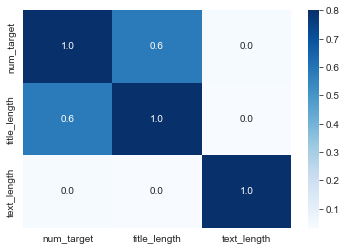

In [137]:
correlation=df.corr()
sns.heatmap(correlation,cbar=True,fmt='.1f',vmax=0.8,annot=True,cmap='Blues')

###### thier are relation between target and title length

##### distribution of ham and spam title length

<AxesSubplot:xlabel='title_length', ylabel='Count'>

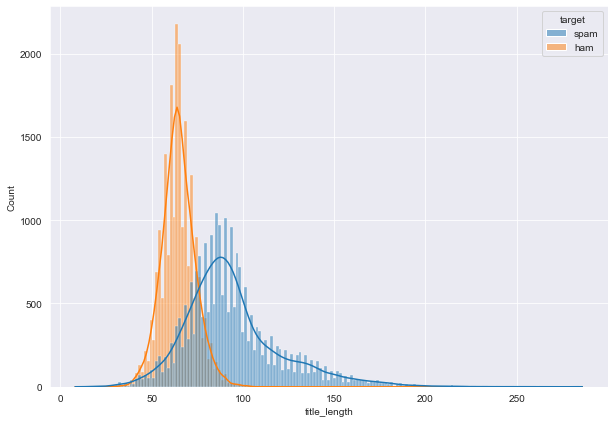

In [138]:
plt.figure(figsize=(10,7))
sns.histplot(x='title_length',data=df,kde=True,hue='target')

###### we note that the titles that have a big length of words are ham, and otherwise the titles that have a small length of words are spam

##### what subjects have more spam ?

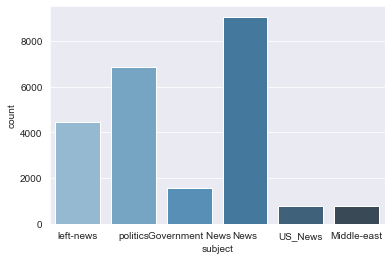

In [150]:
sns.countplot(x='subject',data=df[df['target']=='spam'],palette='Blues_d');

##### what subjects have more ham ?

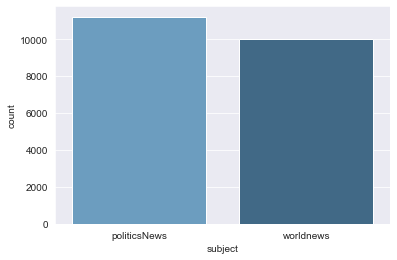

In [151]:
sns.countplot(x='subject',data=df[df['target']=='ham'],palette='Blues_d');

In [156]:
df.date.max()-df.date.min()

Timedelta('1056 days 00:00:00')

##### the distribution of  spam and ham over the time

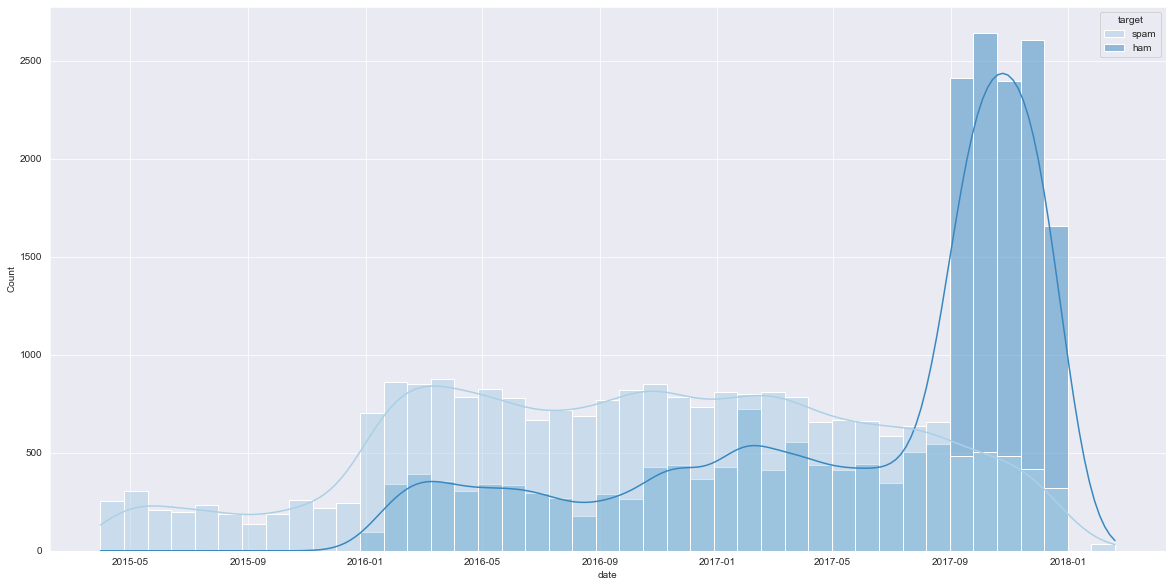

In [160]:
plt.figure(figsize=(20,10))
sns.histplot(x='date',data=df,hue='target',kde='True',palette='Blues');


###### we note spam news takes a normal distribution while ham news takes a left-skewed distribution over the time

##### spam and ham over the time

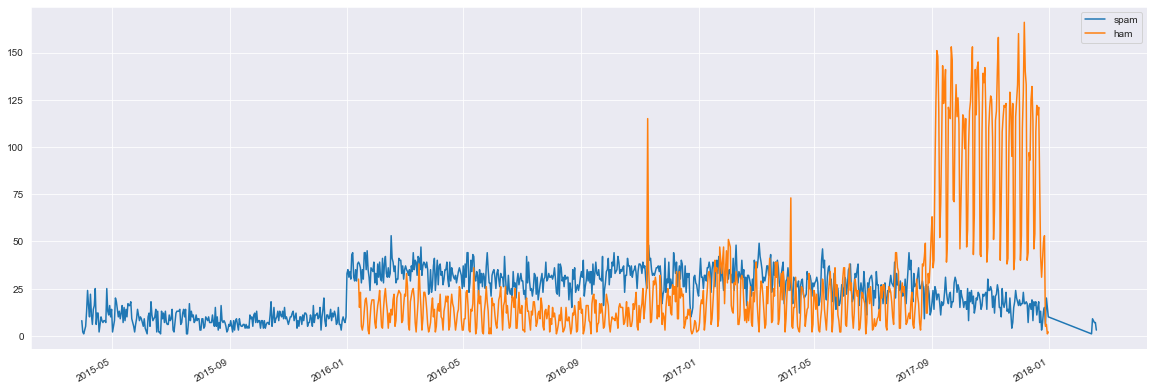

In [178]:
plt.figure(figsize=(20,7))
df[df['target']=='spam']['date'].value_counts().plot(kind='line',label='spam')
df[df['target']=='ham']['date'].value_counts().plot(kind='line',label='ham')
plt.legend();

###### the ham texts increase between 2017-9 to 2018-1 
###### the spam texts increase from 2016-1 to 2017-9 and return decreased

In [179]:
# save data frame in fake_news.csv file
df.to_csv('fake_news.csv',index=False)